<a href="https://colab.research.google.com/github/dahyun723/ESAA_1/blob/main/week5_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 ch3. 1-7 (145p-180p)

평가

#분류의 성능 평가 지표

특히 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 짚표에 대해서 집중

이진 분류에서는 정확도 보다는 다른 성능 평가 지표가 더 중요시 됨

분류의 성능 평가 지표

정확도/ 오차행렬/ 정밀도/ 재현율/ F1스코어/ ROC AUC


이진 >> 멀티 평가지표가 더 중요함


##1. 정확도

정확도 = 예측 결과가 동일한 데이터 건수/ 전체 예측 데이터 건수

직관적으로 모델 예측 성능을 나타내는 평가 지표

하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않음

In [3]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  def fit(self,X, y=None):
    pass

def predict(self,X):
  pred = np.zeros((X.shape[0],1))
  for i in range(X.shape[0]):
    if X['Sex'].iloc[i] == 1:
      pred[i] = 0
    else:
      pred[i] = 1
  return pred

In [29]:
#생성된 MyDymmyclassifier을 이용해 앞 장의 타이타닉 생존자 예측 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [30]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df

def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df


In [34]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도: 0.6145


In [35]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [38]:
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())
import numpy as np
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


##오차행렬(confusion matrix)
학습된 분류모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
즉 이진 분류의 예측오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

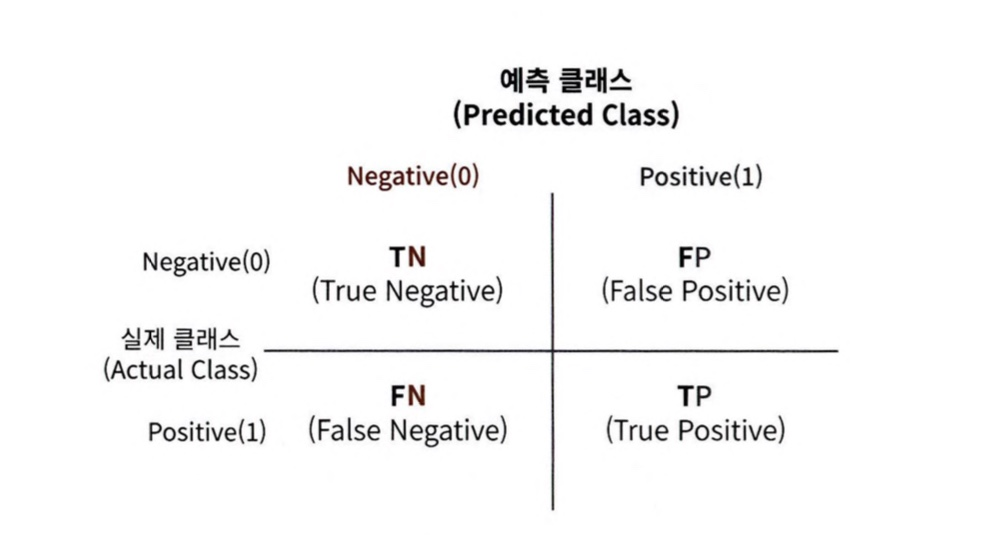

사이킷런은 오차 행렬을 구하기 위해 confusion_matric() 제공

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

##정밀도와 재현율
정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가지표이다

정밀도 = TP / (FP + TP)


재현율 = TP / (FN + TP)

정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라 특정 지표가 더 중요한 지표가 된다

사이킷런은 정밀도 계산을 위해서 precision_score()
재현율 계산을 위해 recall_score()을 API로 제공한다
평가를 간편하게 적용하기 위해서 confusion / matrix / accuracy / precision / recall 등의 평가를 한번에 호출하는 get_clf_eval() 함수를 만들도록한다

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, pair_confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver = 'liblinear')



In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 전처리 함수
def transform_features(df):
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)  # 불필요한 열 제거
    df['Age'] = df['Age'].fillna(df['Age'].mean())  # 나이 결측값 처리
    df['Embarked'] = df['Embarked'].fillna('S')  # 승선항 결측값 처리
    df['Fare'] = df['Fare'].fillna(0)  # 요금 결측값 처리
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # 성별 변환
    df = pd.get_dummies(df, columns=['Embarked'])  # 승선항 One-Hot 인코딩
    return df

# 타이타닉 데이터 불러오기
titanic_df = pd.read_csv('titanic_train.csv')

# Survived 데이터를 레이블로 사용
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# Logistic Regression 모델 학습
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

# 예측 및 정확도 출력
pred = lr_clf.predict(X_test)
print('Logistic Regression의 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 예측 확률과 결과 출력
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])


Logistic Regression의 정확도: 0.7989
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85869768 0.14130232 0.        ]
 [0.88936709 0.11063291 0.        ]
 [0.90576092 0.09423908 0.        ]]


In [70]:

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'. format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.85869768 0.14130232]
 [0.88936709 0.11063291]
 [0.90576092 0.09423908]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85869768 0.14130232 0.        ]
 [0.88936709 0.11063291 0.        ]
 [0.90576092 0.09423908 0.        ]]


정밀도 / 재현율 트레이드오프

분류하려는 업무의 특성상 정밀도나 재현율이 특별히 강조돼야할 경우 분류의 결정 임곗값을 조정해 높일 수 있다

하지만 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다

이를 정밀도/ 재현율의 트레이드 오프라고 부른다

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()
를 제공한다

In [71]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.85869768 0.14130232]
 [0.88936709 0.11063291]
 [0.90576092 0.09423908]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85869768 0.14130232 0.        ]
 [0.88936709 0.11063291 0.        ]
 [0.90576092 0.09423908 0.        ]]


In [72]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [73]:

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1]. reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)


In [74]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[85 25]
 [14 55]]
정확도: 0.7821, 정밀도: 0.6875, 재현율: 0.7971


In [75]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    # thresholds list 객체 내의 값을 차례로 interaction 하면서 Evaluation 수행
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold = custom_threshold). fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[85 25]
 [14 55]]
정확도: 0.7821, 정밀도: 0.6875, 재현율: 0.7971
임곗값: 0.45
오차행렬
[[91 19]
 [16 53]]
정확도: 0.8045, 정밀도: 0.7361, 재현율: 0.7681
임곗값: 0.5
오차행렬
[[93 17]
 [19 50]]
정확도: 0.7989, 정밀도: 0.7463, 재현율: 0.7246
임곗값: 0.55
오차행렬
[[97 13]
 [21 48]]
정확도: 0.8101, 정밀도: 0.7869, 재현율: 0.6957
임곗값: 0.6
오차행렬
[[100  10]
 [ 25  44]]
정확도: 0.8045, 정밀도: 0.8148, 재현율: 0.6377


In [76]:
# precision_recall_curve() 를 이용해 타이타닉 에측 모델의 임곗값별 정밀도와 재현율 구하기

from sklearn.metrics import precision_recall_curve

# 레이브 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape :', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape : (179,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값: [0.04 0.09 0.11 0.13 0.15 0.21 0.29 0.44 0.58 0.66 0.81 0.91]
샘플 임계값별 정밀도: [0.385 0.402 0.443 0.478 0.538 0.596 0.674 0.73  0.797 0.841 1.    1.   ]
샘플 임계값별 재현율: [1.    0.957 0.957 0.928 0.928 0.899 0.87  0.783 0.681 0.536 0.42  0.203]


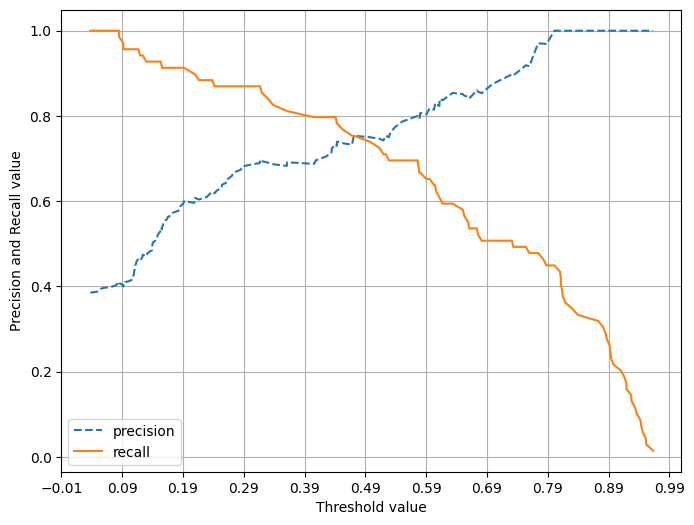

In [77]:
# precision_recall_curve() 를 이용해 정밀도의 재현율 곡선을 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarry 와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks (np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

##4. F1 스코어

정밀도와 재현율을 결합한 지표

어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
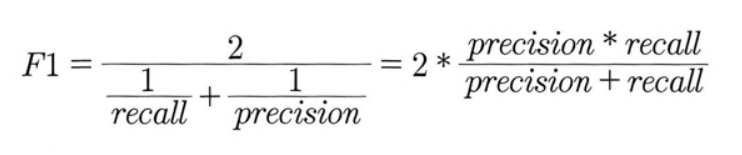

In [78]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'. format(f1))


F1 스코어 : 0.7353


In [79]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스커오 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'. format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[85 25]
 [14 55]]
정확도: 0.7821, 정밀도: 0.6875, 재현율:0.7971, F1:0.7383
임곗값: 0.45
오차 행렬
[[91 19]
 [16 53]]
정확도: 0.8045, 정밀도: 0.7361, 재현율:0.7681, F1:0.7518
임곗값: 0.5
오차 행렬
[[93 17]
 [19 50]]
정확도: 0.7989, 정밀도: 0.7463, 재현율:0.7246, F1:0.7353
임곗값: 0.55
오차 행렬
[[97 13]
 [21 48]]
정확도: 0.8101, 정밀도: 0.7869, 재현율:0.6957, F1:0.7385
임곗값: 0.6
오차 행렬
[[100  10]
 [ 25  44]]
정확도: 0.8045, 정밀도: 0.8148, 재현율:0.6377, F1:0.7154


##5. ROC곡선과 AUC

ROC곡선과 이에 기반한 AUC스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표



In [80]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0] 은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.96 0.75 0.66 0.6  0.58 0.47 0.41 0.24 0.16 0.12]
샘플 임곗값별 FPR: [0.    0.027 0.064 0.082 0.109 0.155 0.227 0.336 0.5   0.691]
샘플 임곗값별 TPR: [0.014 0.493 0.536 0.638 0.667 0.754 0.797 0.884 0.913 0.957]


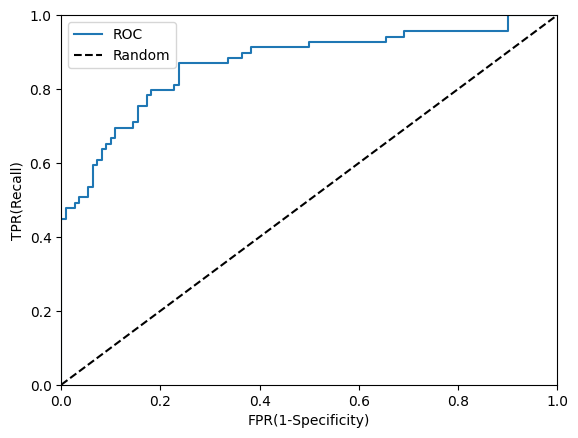

In [81]:
def roc_curve_plot(y_test, pred_proba_c1) :
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # Rco 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    # FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xlim(0,1) ; plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [82]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'. format(roc_score))

ROC AUC 값: 0.8692


In [83]:
def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score (y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0: .4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\ F1: {3:.4f}, AUC:{4:.4f}'. format(accuracy, precision, recall, f1, roc_auc))


##6. 피마 인디언 당뇨병 예측


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler




In [91]:
from google.colab import files
uploaded = files.upload()
diabetes_df = pd.read_csv('diabetes.csv')

print(diabetes_df['Outcome'].value_counts())
diabetes_df.head()

Saving diabetes.csv to diabetes (1).csv
Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도:  0.7727, 정밀도: 0.7111, 재현율: 0.5926,\ F1: 0.6465, AUC:0.8083


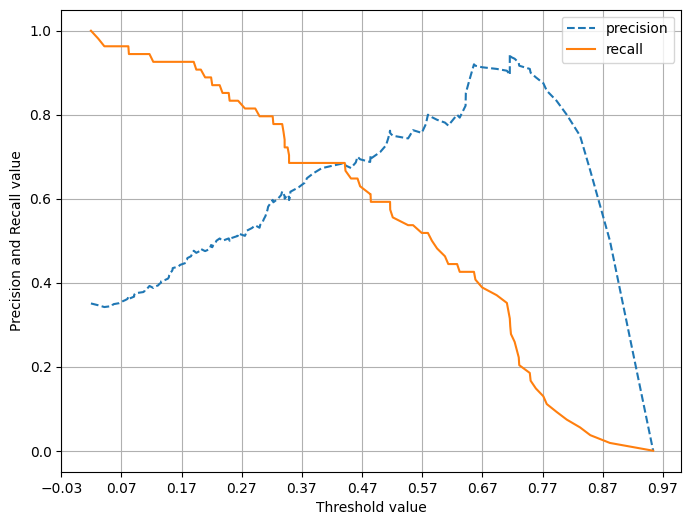

In [94]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)


In [96]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


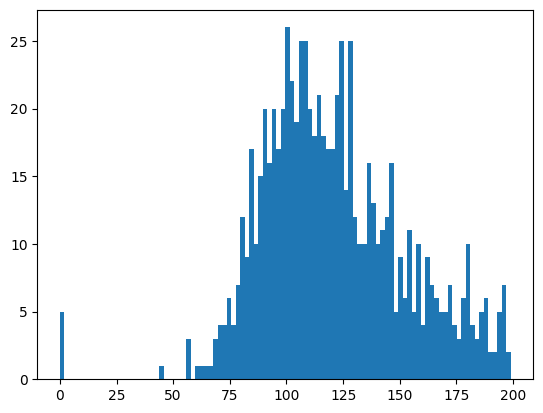

In [97]:
plt.hist(diabetes_df['Glucose'], bins = 100)
plt.show()

In [98]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
  zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [99]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도:  0.7987, 정밀도: 0.7674, 재현율: 0.6111,\ F1: 0.6804, AUC:0.8059


In [101]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3


InvalidParameterError: The 'y_score' parameter of roc_auc_score must be an array-like. Got None instead.

In [102]:
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [21 33]]
정확도:  0.7857, 정밀도: 0.7333, 재현율: 0.6111,\ F1: 0.6667, AUC:0.8059
